In [1]:
from IPython.core.debugger import set_trace

In [2]:
import sys
sys.path.append("/home/kim2712/Desktop/research/generative_quantile/generative_quantile")

In [3]:
from _data.simulator_Lotka import simulate

In [4]:
thetas,x,y=simulate()

In [9]:
def simulate(a0 = 1,b0 = 0.01,c0 = 0.5, d0 = 0.01,
             x0=100, y0=50, 
             timestep=0.2):
    
    import random
    '''
    It considers: t = np.linspace(0,20,num=201) 
    
    x0: prey, y0: predator
    
    Birth rate of rabbits
    a0 = 1 #theta3: 1 U[0,2]
    
    Death rate of rabbits due to predation
    b0 = 0.01 #theta4: 0.01 U[0,0.1]
    
    Natural death rate of foxes
    c0 = 0.5 #theta2: 0.5 U[0,1]
    
    Factor that describes how many eaten rabbits give birth to a new fox
    d0 = 0.01 #theta1: 0.01 U[0,0.1]
    '''
    
    x=[x0] #Prey
    y=[y0] #Predator

    for _ in range(200):
        a,b,c,d = a0*random.uniform(0.9,1.1),b0*random.uniform(0.9,1.1),c0*random.uniform(0.9,1.1),d0*random.uniform(0.9,1.1)
        #a,b,c,d=a0,b0,c0,d0
        # evaluate the current differentials
        xd = x[-1] * (a - b*y[-1])
        yd = -y[-1]* (c - d*x[-1])

        # add the next value of x and y using differentials
        x.append(x[-1] + xd * timestep)
        y.append(y[-1] + yd * timestep)

    return x,y

In [16]:
import numpy as np

def integrate(a0 = [1],
             b0 = [0.01],
             c0 = [0.5], 
             d0 = [0.01],
             x0=100, y0=50, 
             timestep=0.1, np_random=None, seed=1234, u_up=1.2, u_down=0.8):
    

    if np_random is None:
        np_random = np.random.RandomState(seed)
    '''
    It considers: t = np.linspace(0,20,num=201) 
    
    x0: prey, y0: predator
    
    Birth rate of rabbits
    a0 = 1 #theta3: 1 U[0,2]
    
    Death rate of rabbits due to predation
    b0 = 0.01 #theta4: 0.01 U[0,0.1]
    
    Natural death rate of foxes
    c0 = 0.5 #theta2: 0.5 U[0,1]
    
    Factor that describes how many eaten rabbits give birth to a new fox
    d0 = 0.01 #theta1: 0.01 U[0,0.1]
    '''
    batch_size = len(a0)
    
    x_prev = np.ones(batch_size)*x0
    y_prev = np.ones(batch_size)*y0
    
    x=[x_prev] #Prey
    y=[y_prev] #Predator
    
    for _ in range(100):
        a= a0*np_random.uniform(low=u_down, high=u_up, size=batch_size)
        b= b0*np_random.uniform(low=u_down, high=u_up, size=batch_size)
        c= c0*np_random.uniform(low=u_down, high=u_up, size=batch_size)
        d= d0*np_random.uniform(low=u_down, high=u_up, size=batch_size)
        
        # evaluate the current differentials
        xd = x_prev  * (a - b*y_prev)
        yd = -y_prev * (c - d*x_prev)
        
        # add the next value of x and y using differentials
        x_new = x_prev + xd * timestep
        y_new = y_prev + yd * timestep
                 
        x.append(x_new)
        y.append(y_new)
        
        x_prev, y_prev = x_new,y_new
        
    return np.column_stack(x),np.column_stack(y)

def simulate(batch_size = 100,np_random=None, seed=1234,x0=100, y0=50,
             u_up=1.2, u_down=0.8,timestep=0.1):
    if np_random is None:
        np_random = np.random.RandomState(seed)
        
    a = np_random.uniform(low=0, high=2, size=batch_size)
    b = np_random.uniform(low=0, high=0.1, size=batch_size)
    c = np_random.uniform(low=0, high=1, size=batch_size)
    d = np_random.uniform(low=0, high=0.1, size=batch_size)
        
    x,y = integrate(a0 = a,b0 = b,c0 = c, d0 = d, x0=x0, y0=y0, 
             timestep=timestep, np_random=np_random, u_up=u_up, u_down=u_down)
    thetas = [a,b,c,d]
    return thetas, x,y

In [17]:
thetas,x,y=simulate(timestep=0.2)

<ipython-input-16-3fc829e05371>:45: RuntimeWarning: overflow encountered in multiply
  xd = x_prev  * (a - b*y_prev)
<ipython-input-16-3fc829e05371>:46: RuntimeWarning: overflow encountered in multiply
  yd = -y_prev * (c - d*x_prev)


In [18]:
x.shape, y.shape

((100, 101), (100, 101))

In [19]:
import numpy as np
np.stack([x,y],2).shape

(100, 101, 2)

In [20]:
thetas[0]

array([0.3830389 , 1.24421754, 0.87545548, 1.57071717, 1.55995162,
       0.54518521, 0.55292851, 1.60374436, 1.91627871, 1.75186527,
       0.71563454, 1.00199025, 1.36692587, 1.42540405, 0.74050151,
       1.12239237, 1.00616633, 0.0275369 , 1.54565324, 1.76528238,
       0.72977197, 1.23079236, 0.15076248, 0.73764801, 1.8662802 ,
       1.30275629, 0.79440516, 1.57746029, 0.63367224, 1.13619731,
       1.73825478, 0.87234685, 1.60429528, 0.28753365, 1.40852194,
       1.40916262, 0.43758421, 1.84973526, 0.88428151, 1.81863192,
       0.11961845, 0.36857417, 0.09471056, 1.34976189, 1.18924956,
       1.06662033, 0.08664813, 1.12286616, 0.65933689, 1.00593367,
       0.22378864, 1.21438741, 1.13188929, 0.01352812, 1.23488342,
       1.82424577, 1.58104827, 1.98416293, 1.91760352, 1.58392827,
       0.57050192, 1.24983341, 0.95618759, 0.39135036, 0.7646349 ,
       0.10774737, 0.90329682, 1.96400948, 0.2478854 , 0.2387618 ,
       1.47704611, 1.17460727, 0.94326507, 0.21425363, 0.45843

In [21]:

xs,ys = integrate(a0 = np.ones(100)*1.0,
                 b0 = np.ones(100)*0.01,
                 c0 = np.ones(100)*0.5, 
                 d0 = np.ones(100)*0.01,
                 u_up=1.3,u_down=0.7)
                 #u_up=1.3, u_down=0.7)#, a0 = 1, b0 = 0.02,c0 = 1, d0 = 0.01)

In [22]:
xs.shape

(100, 101)

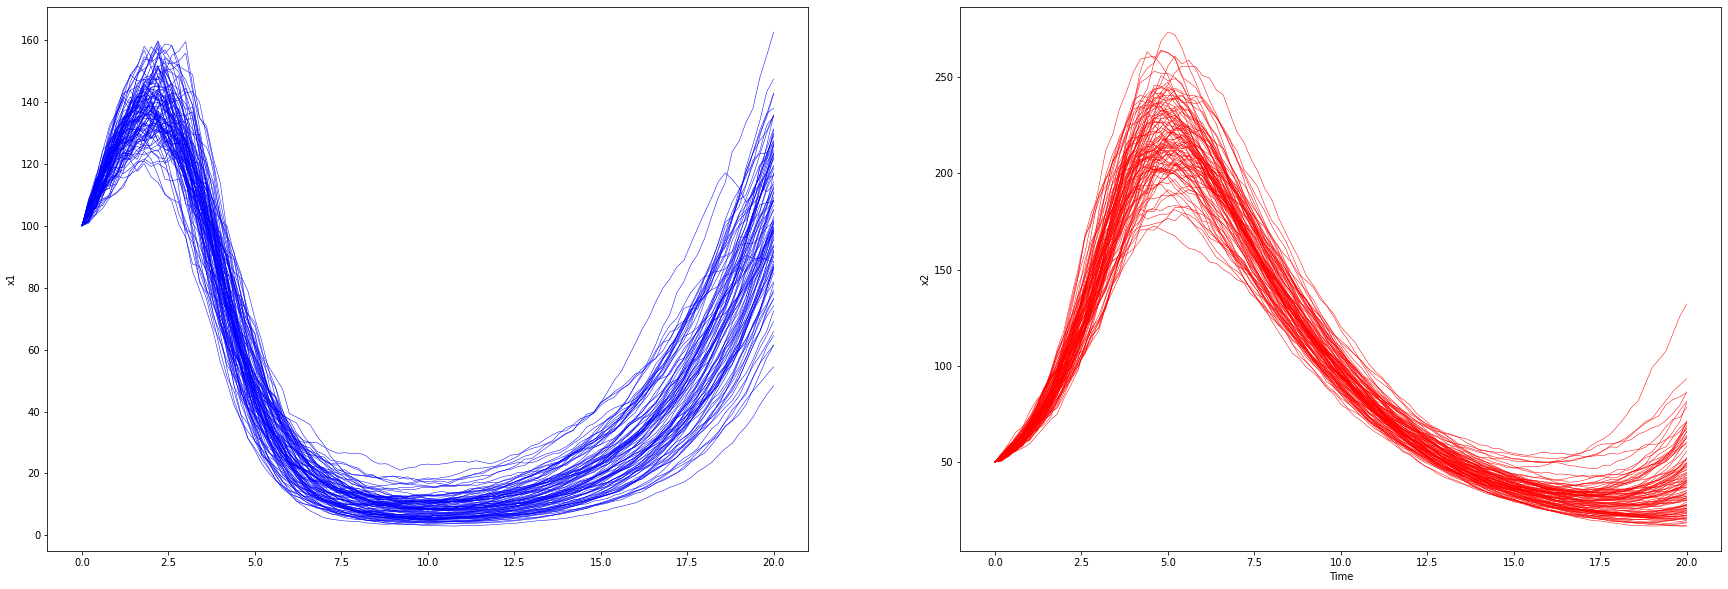

In [24]:
import matplotlib.pyplot as plt
t = np.linspace(0,20,num=101) 

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

for i in range(100):
    x,y = xs[i],ys[i]
    line1, = ax1.plot(t,x, color="b", linewidth=0.5)
    line2, = ax2.plot(t,y, color="r", linewidth=0.5)
    ax1.set_ylabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_xlabel("Time")

plt.show()

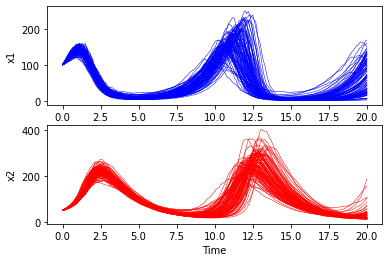

In [28]:
x.shape

(201,)

In [44]:
import random
# initial conditions for the rabbit (x) and fox (y) populations at time=0
x=[100] #Prey
y=[50] #Predator

a0 = 1 #
b0 = 0.01 #theta4: 0.01 U[0,0.1]
c0 = 0.5 #theta2: 0.5 U[0,1]
d0 = 0.01 #theta1: 0.01 U[0,0.1]
timestep=0.1
for _ in range(200):
    a,b,c,d = a0*random.uniform(0.9,1.1),b0*random.uniform(0.9,1.1),c0*random.uniform(0.9,1.1),d0*random.uniform(0.9,1.1)
    #a,b,c,d=a0,b0,c0,d0
    # evaluate the current differentials
    xd = x[-1] * (a - b*y[-1])
    yd = -y[-1]* (c - d*x[-1])

    # add the next value of x and y using differentials
    x.append(x[-1] + xd * timestep)
    y.append(y[-1] + yd * timestep)

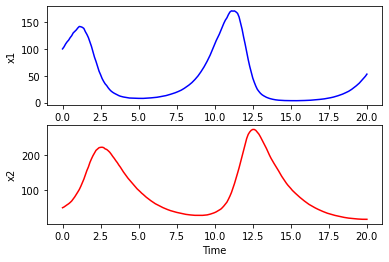

In [45]:
f,(ax1,ax2) = plt.subplots(2)
line1, = ax1.plot(t,x, color="b")
line2, = ax2.plot(t,y, color="r")
ax1.set_ylabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlabel("Time")

plt.show()

In [3]:

import matplotlib.pyplot as plt
from scipy.integrate import odeint

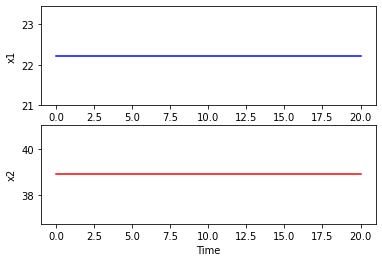

In [3]:
# y0 = [10,10] # [species 1 (x1), species 2 (x2)] units in hundreds

t = np.linspace(0,20,num=201) 
timestep=0.1

# params
r1 = 2
r2 = 1
a1 = 2
a2 = 5
k1 = 100
k2 = 150


x1_s = (k1-a1*k2) / (1-a2*a1)
x2_s = (k2-a2*k1) / (1-a1*a2)


y0 = [x1_s,x2_s] # [species 1 (x1), species 2 (x2)] units in hundreds


params = [r1,r2,a1,a2,k1,k2]



def sim(variables,t,params):

    # species1 population level
    x1 = variables[0]

    # species2 population level
    x2 = variables[1]

    r1 = params[0]
    r2 = params[1]
    a1 = params[2]
    a2 = params[3]
    k1 = params[4]
    k2 = params[5]

    dx1dt = r1 * x1 * (1 - (x1 + a1*x2)/k1)
    dx2dt = r2 * x2 * (1 - (x2 + a2*x1)/k2)

    return([dx1dt,dx2dt])


y = odeint(sim, y0, t,args=(params,))

# print(y)


f,(ax1,ax2) = plt.subplots(2)
line1, = ax1.plot(t,y[:,0], color="b")
line2, = ax2.plot(t,y[:,1], color="r")
ax1.set_ylabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlabel("Time")

plt.show()

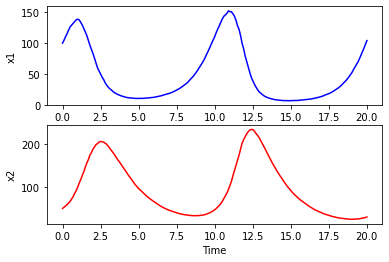

In [48]:
f,(ax1,ax2) = plt.subplots(2)
line1, = ax1.plot(t,x, color="b")
line2, = ax2.plot(t,y, color="r")
ax1.set_ylabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlabel("Time")

plt.show()